![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None
         culmen_length_mm  culmen_depth_

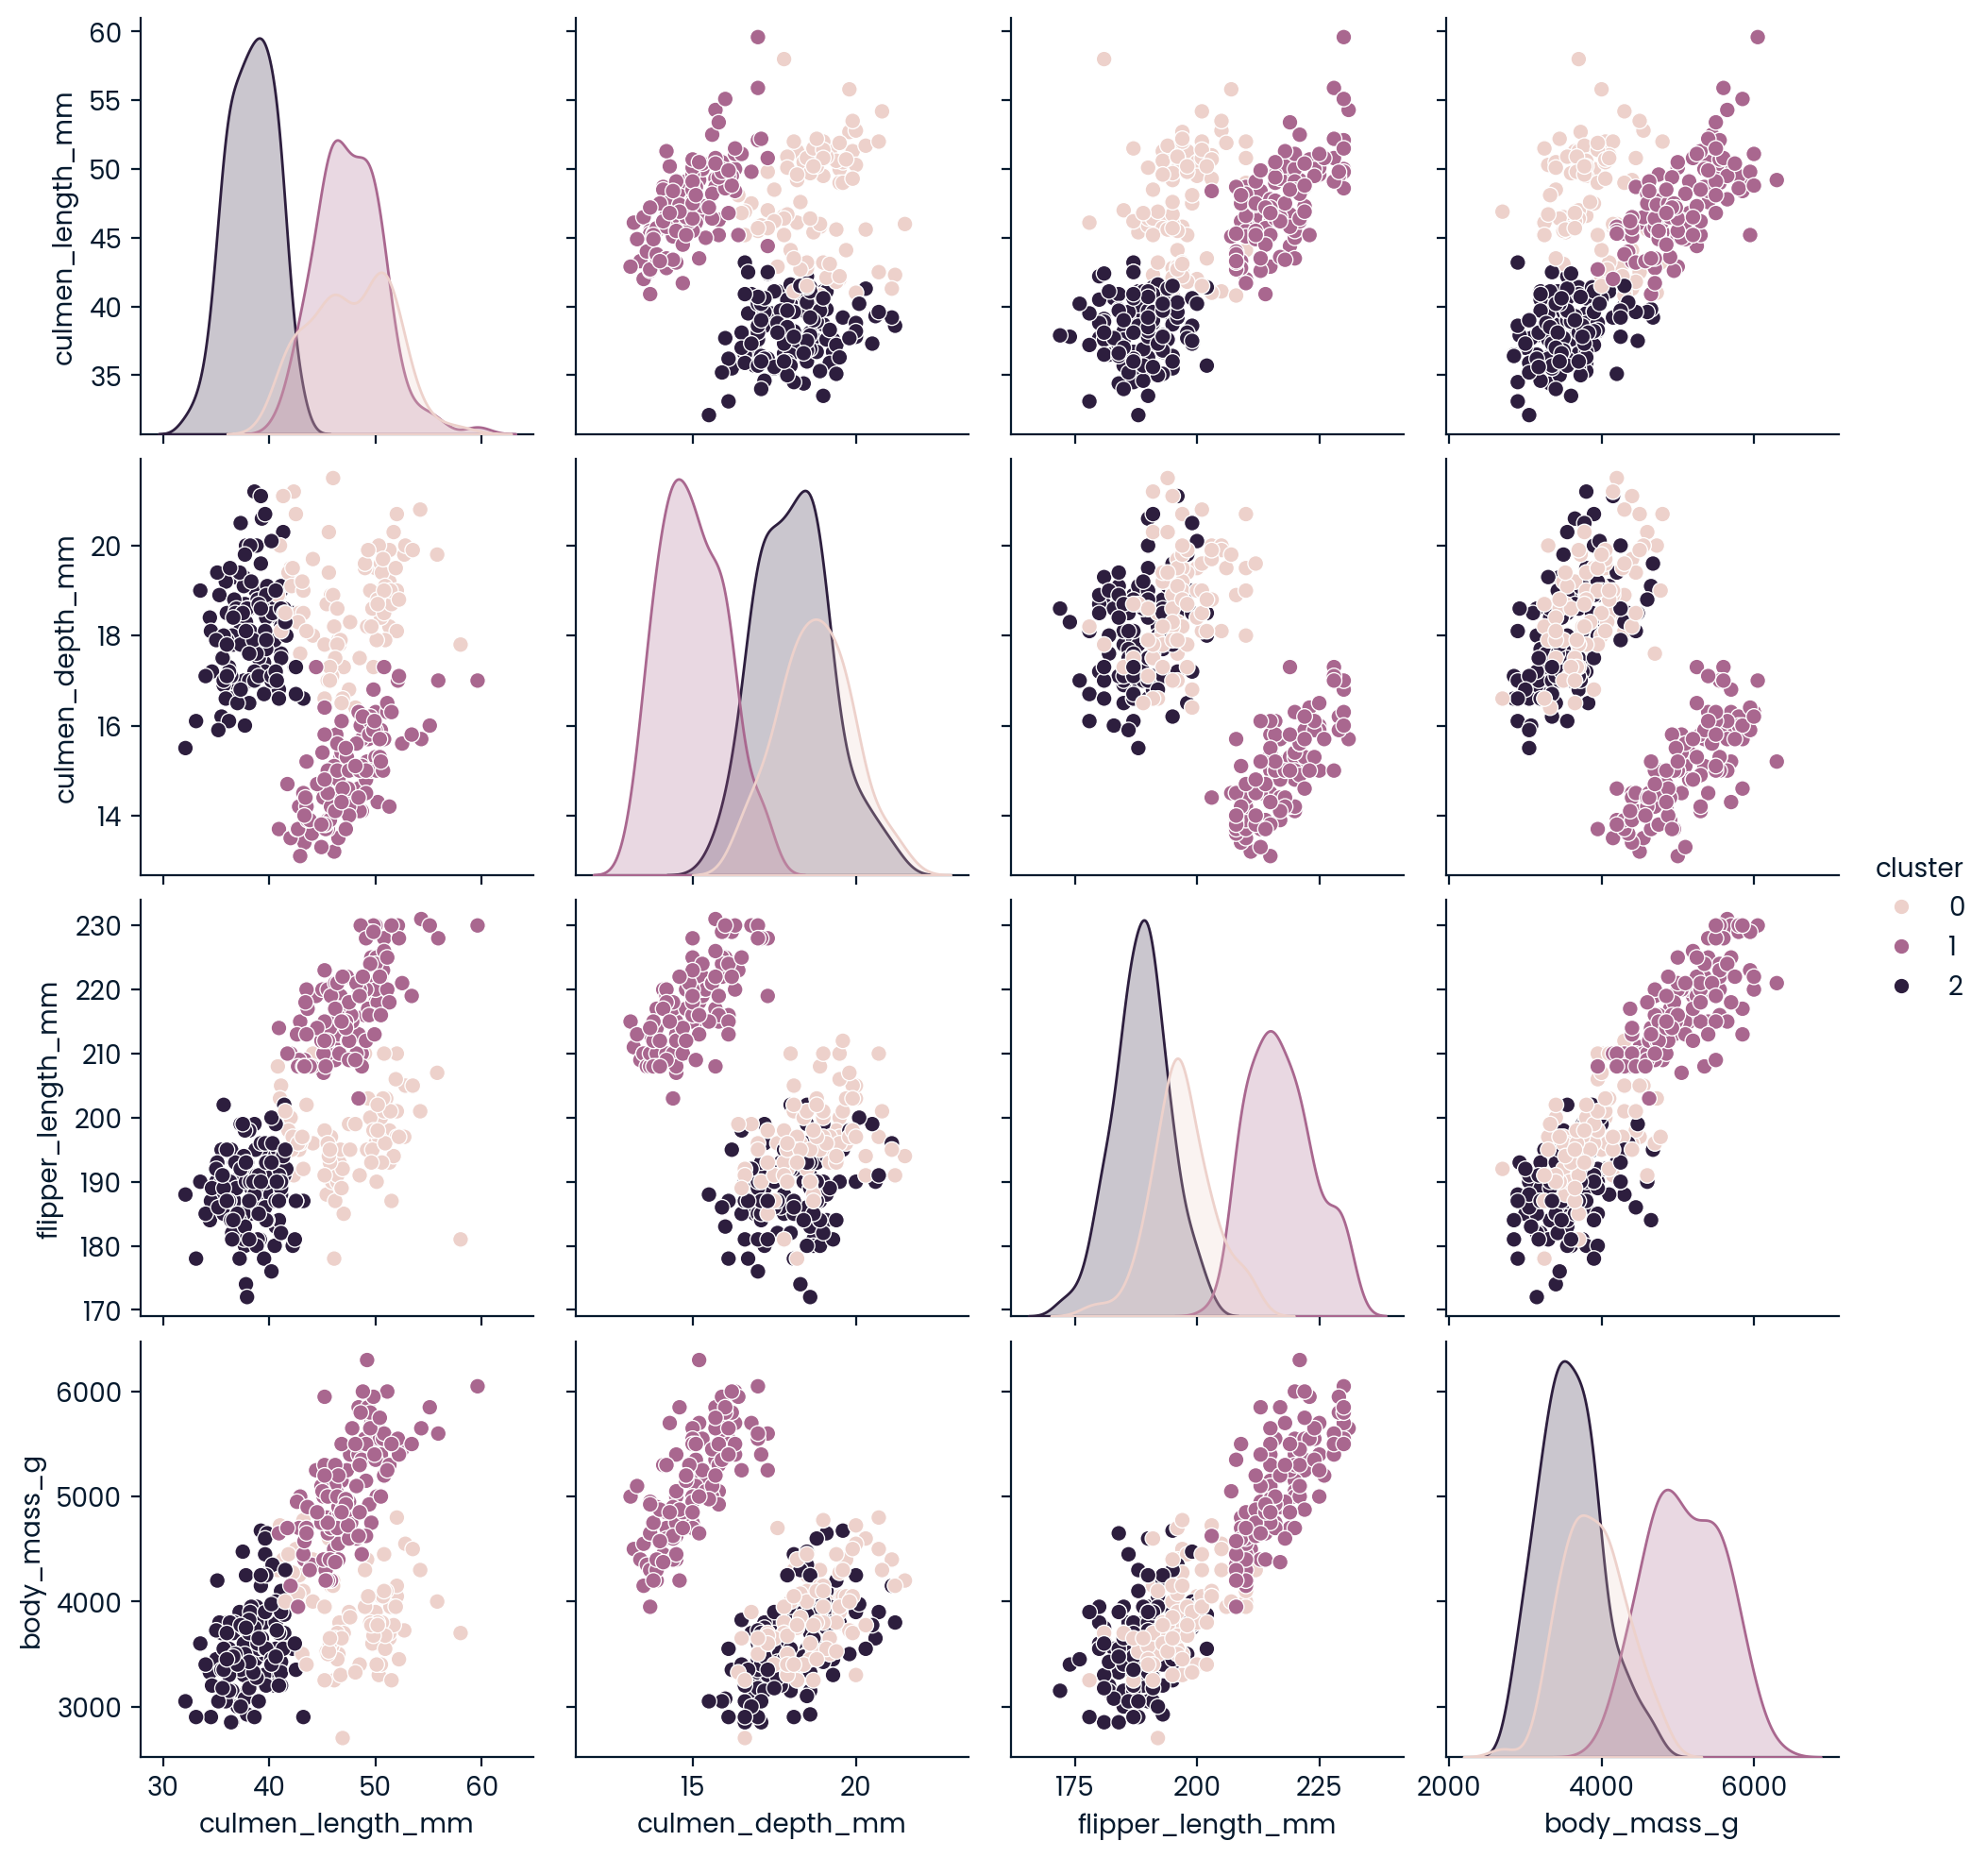

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
print(penguins_df.head())

# Inspecting data types and missing values
print(penguins_df.info())

# Handling missing values by dropping rows with any missing values
penguins_df = penguins_df.dropna()

# Selecting numeric columns for clustering
numeric_columns = penguins_df.select_dtypes(include=['float64', 'int64']).columns
penguins_numeric_df = penguins_df[numeric_columns]

# Standardizing the numeric data
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_numeric_df)

# Performing KMeans clustering
# Choosing a reasonable number of clusters (let's assume 3 for this example)
kmeans = KMeans(n_clusters=3, random_state=42)
penguins_df['cluster'] = kmeans.fit_predict(penguins_scaled)

# Collecting cluster statistics
stat_penguins = penguins_df.groupby('cluster').mean()

# Dropping non-numeric columns (though in this case, only 'cluster' might be non-numeric)
stat_penguins = stat_penguins.drop(columns=['cluster'], errors='ignore')

# Displaying the resulting DataFrame
print(stat_penguins)

# Optionally, visualize the clusters (e.g., with a pairplot)
import seaborn as sns
sns.pairplot(penguins_df, hue='cluster', diag_kind='kde')
plt.show()
